Частина 1

In [1]:
import string
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [2]:
(training_images, training_labels), (validation_images, validation_labels) = fashion_mnist.load_data()

In [3]:
print(f"Training images has shape: {training_images.shape} and dtype: {training_images.dtype}")
print(f"Training labels has shape: {training_labels.shape} and dtype: {training_labels.dtype}")
print(f"Validation images has shape: {validation_images.shape} and dtype: {validation_images.dtype}")
print(f"Validation labels has shape: {validation_labels.shape} and dtype: {validation_labels.dtype}")

Training images has shape: (60000, 28, 28) and dtype: uint8
Training labels has shape: (60000,) and dtype: uint8
Validation images has shape: (10000, 28, 28) and dtype: uint8
Validation labels has shape: (10000,) and dtype: uint8


In [6]:
def train_val_generators(training_images, training_labels, validation_images, validation_labels):

    training_images = np.expand_dims(training_images, axis=3)
    validation_images = np.expand_dims(validation_images, axis=3)
    train_datagen = ImageDataGenerator(rescale=1./255.,
                                       rotation_range=40,
                                       width_shift_range=.2,
                                       height_shift_range=.2,
                                       shear_range=.2,
                                       zoom_range=.2,
                                       fill_mode='nearest',
                                       horizontal_flip=True)

    train_generator = train_datagen.flow(x=training_images,
                                         y=training_labels,
                                         batch_size=32)

    validation_datagen = ImageDataGenerator(rescale=1./255.,)
    validation_generator = validation_datagen.flow(x=validation_images,
                                                   y=validation_labels,
                                                   batch_size=32)

    return train_generator, validation_generator

In [7]:
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (60000, 28, 28, 1)
Labels of training generator have shape: (60000,)
Images of validation generator have shape: (10000, 28, 28, 1)
Labels of validation generator have shape: (10000,)


In [8]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (5, 5), padding="same", activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, (5, 5), padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, (5, 5), padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return model

In [9]:
model = create_model()

history = model.fit(train_generator,
                    epochs=8,
                    batch_size=128,
                    validation_data=validation_generator)




Epoch 1/8


1875/1875 [==============================] - 164s 87ms/step - loss: 0.9305 - accuracy: 0.6529 - val_loss: 0.5883 - val_accuracy: 0.7753
Epoch 2/8
1875/1875 [==============================] - 155s 82ms/step - loss: 0.6458 - accuracy: 0.7565 - val_loss: 0.5023 - val_accuracy: 0.8102
Epoch 3/8
1875/1875 [==============================] - 155s 82ms/step - loss: 0.5731 - accuracy: 0.7850 - val_loss: 0.4813 - val_accuracy: 0.8233
Epoch 4/8
1875/1875 [==============================] - 155s 83ms/step - loss: 0.5299 - accuracy: 0.8006 - val_loss: 0.4325 - val_accuracy: 0.8389
Epoch 5/8
1875/1875 [==============================] - 155s 83ms/step - loss: 0.4993 - accuracy: 0.8119 - val_loss: 0.4207 - val_accuracy: 0.8451
Epoch 6/8
1875/1875 [==============================] - 156s 83ms/step - loss: 0.4806 - accuracy: 0.8191 - val_loss: 0.3859 - val_accuracy: 0.8569
Epoch 7/8
1875/1875 [==============================] - 158s 84ms/step - loss: 0.4652 - accuracy: 0.8262 - val_loss: 0.3

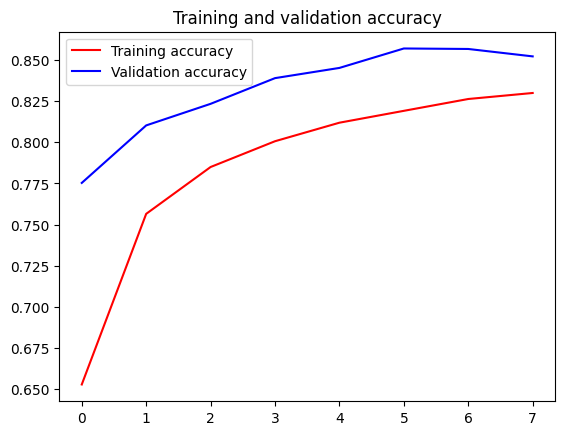

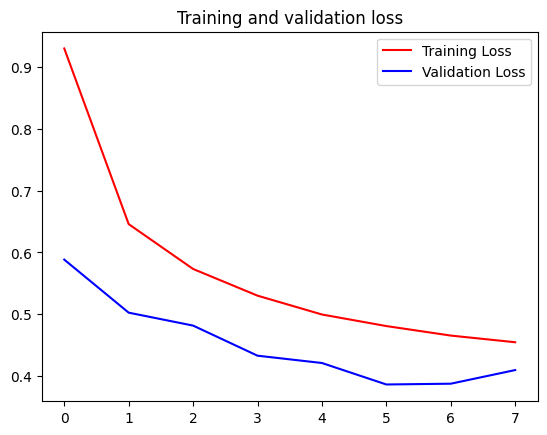

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
results = model.evaluate(validation_generator,verbose=1)
print(results)

313/313 [==============================] - 6s 18ms/step - loss: 0.4093 - accuracy: 0.8521
[0.4092628061771393, 0.8521000146865845]


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         409728    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)         0

313/313 [==============================] - 6s 19ms/step


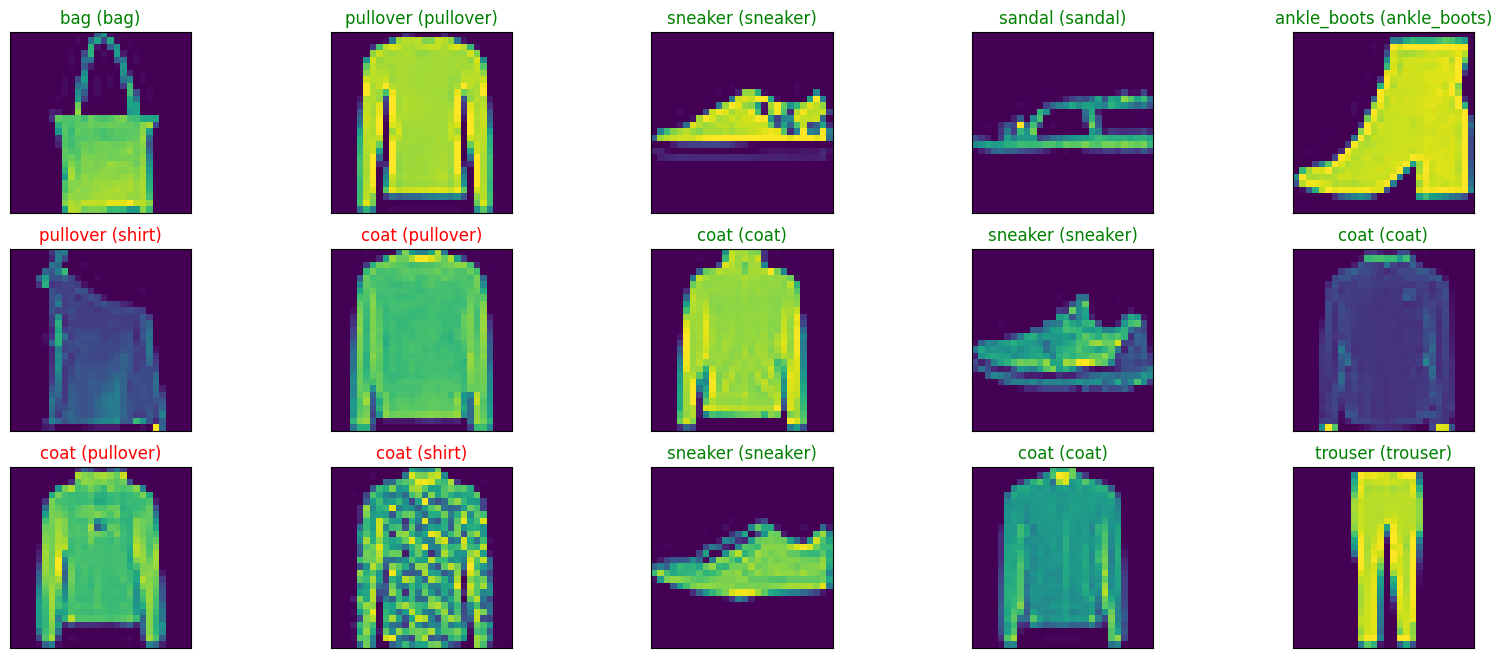

In [13]:
fashion_mnist_labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
                        'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
y_hat = model.predict(validation_images)


figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(validation_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(validation_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = validation_labels[index]
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Частина 2



In [14]:
from keras.applications.vgg16 import VGG16
from keras.utils import to_categorical
from keras.optimizers import Adam

In [15]:
# Resize the images 32*32 for VGG16
training_images_vgg = tf.image.resize(np.array(training_images)[..., tf.newaxis], (32, 32))
training_images_vgg = np.repeat(training_images_vgg, 3, axis=-1)
validation_images_vgg = tf.image.resize(np.array(validation_images)[..., tf.newaxis], (32, 32))
validation_images_vgg = np.repeat(validation_images_vgg, 3, axis=-1)

training_images_vgg = np.array(training_images_vgg) / 255.0
validation_images_vgg = np.array(validation_images_vgg) / 255.0

In [16]:
training_images_vgg.shape, validation_images_vgg.shape

((60000, 32, 32, 3), (10000, 32, 32, 3))

In [17]:
num_classes = 10
training_labels_vgg = to_categorical(training_labels, num_classes)
validation_labels_vgg = to_categorical(validation_labels, num_classes)

In [18]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

model_vgg = Sequential()
model_vgg.add(conv_base)
model_vgg.add(Flatten())
model_vgg.add(Dense(256, activation="relu"))
model_vgg.add(Dense(10, activation="softmax"))

model_vgg.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history_vgg = model_vgg.fit(
    training_images_vgg, training_labels_vgg, epochs=8, verbose=1, batch_size=128, validation_split=0.2
)

58889256/58889256 [==============================] - 37s 1us/step
Epoch 1/8
375/375 [==============================] - 211s 561ms/step - loss: 0.6129 - accuracy: 0.7905 - val_loss: 0.4833 - val_accuracy: 0.8251
Epoch 2/8
375/375 [==============================] - 216s 576ms/step - loss: 0.4316 - accuracy: 0.8422 - val_loss: 0.4273 - val_accuracy: 0.8443
Epoch 3/8
375/375 [==============================] - 220s 587ms/step - loss: 0.3943 - accuracy: 0.8560 - val_loss: 0.4083 - val_accuracy: 0.8505
Epoch 4/8
375/375 [==============================] - 220s 586ms/step - loss: 0.3739 - accuracy: 0.8626 - val_loss: 0.3941 - val_accuracy: 0.8534
Epoch 5/8
375/375 [==============================] - 218s 580ms/step - loss: 0.3549 - accuracy: 0.8702 - val_loss: 0.3770 - val_accuracy: 0.8618
Epoch 6/8
375/375 [==============================] - 219s 585ms/step - loss: 0.3402 - accuracy: 0.8739 - val_loss: 0.3804 - val_accuracy: 0.8620
Epoch 7/8
375/375 [==============================] - 218s 583ms/

In [19]:
results_vgg = model_vgg.evaluate(validation_images_vgg, validation_labels_vgg)
print(results_vgg)

313/313 [==============================] - 47s 151ms/step - loss: 0.3694 - accuracy: 0.8672
[0.3693910837173462, 0.8672000169754028]


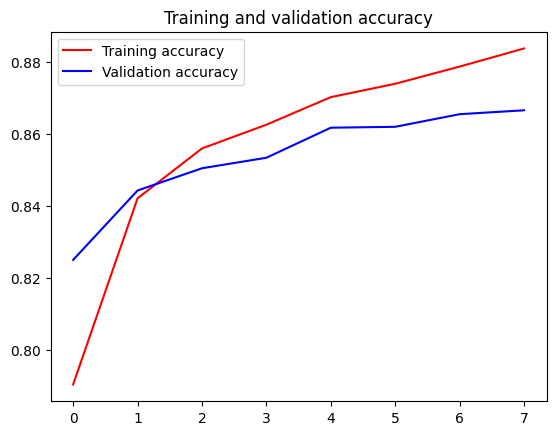

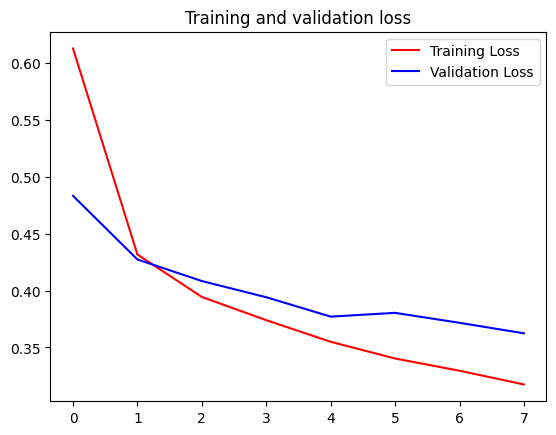

In [20]:
acc = history_vgg.history['accuracy']
val_acc = history_vgg.history['val_accuracy']
loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
model_vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


Висновок


In [22]:
def conclusion(n, v):
    if n > v:
        conclusion = 'Точність згорткової нейромережі краще за точність згорткової нейромережі, що використовує VGG16'
        return conclusion
    else:
        conclusion = 'Точність згорткової нейромережі, що використовує VGG16 краще за точність згорткової нейромережі'
        return conclusion
       
conclusion(history.history['val_accuracy'], history_vgg.history['val_accuracy']) 
        
    
    


'Точність згорткової нейромережі, що використовує VGG16 краще за точність згорткової нейромережі'